In [41]:
import pandas as pd

In [44]:
X = pd.read_csv("data/click/train.csv", nrows=200000)

In [45]:
X.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [17]:
X.shape

(200000, 24)

In [18]:
unused_columns, label_column = ["id", "hour", "device_id", "device_ip"], "click"
X = X.drop(unused_columns, axis=1)

In [19]:
y = X[label_column]

In [20]:
print(X.shape, y.shape)

(200000, 20) (200000,)


In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
X = list(X.drop(label_column, axis=1).T.to_dict().values())

In [23]:
vectorizer = DictVectorizer(sparse=True)
X = vectorizer.fit_transform(X)

In [39]:
pd.DataFrame(X.todense()).head()

,0,1,2,3,4,5,6,7,8,9,...,6560,6561,6562,6563,6564,6565,6566,6567,6568,6569
0,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,-1.0,79.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1005.0,15704.0,320.0,50.0,1722.0,0.0,35.0,100084.0,79.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005.0,15704.0,320.0,50.0,1722.0,0.0,35.0,100084.0,79.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005.0,15706.0,320.0,50.0,1722.0,0.0,35.0,100084.0,79.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1005.0,18993.0,320.0,50.0,2161.0,0.0,35.0,-1.0,157.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
print(X.shape)

(200000, 6570)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140000, 6570) (60000, 6570) (140000,) (60000,)


In [32]:
pkl_data = (X_train, y_train, X_test, y_test)
pd.to_pickle(pkl_data, 'data/click/click.pkl')

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
params = {"max_depth": [3, 10, None]}

In [35]:
tree = DecisionTreeClassifier(criterion="gini", min_samples_split=30)

In [36]:
grid_search = GridSearchCV(tree, params, n_jobs=-1, cv=3, scoring="roc_auc")

In [37]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1, param_grid={'max_depth': [3, 10, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

In [38]:
grid_search.best_params_

{'max_depth': 10}

In [39]:
tree_best = grid_search.best_estimator_

In [40]:
y_pred = tree_best.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8274

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[48462,   990],
       [ 9366,  1182]], dtype=int64)

In [43]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.11205915813424346

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.18584905660377357

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = tree_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

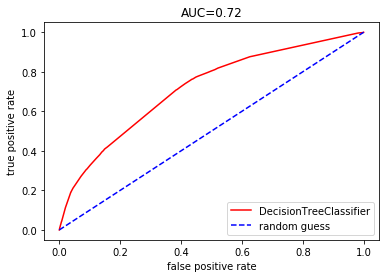

In [48]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, "r-", label="DecisionTreeClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");
plt.show()